In [2]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

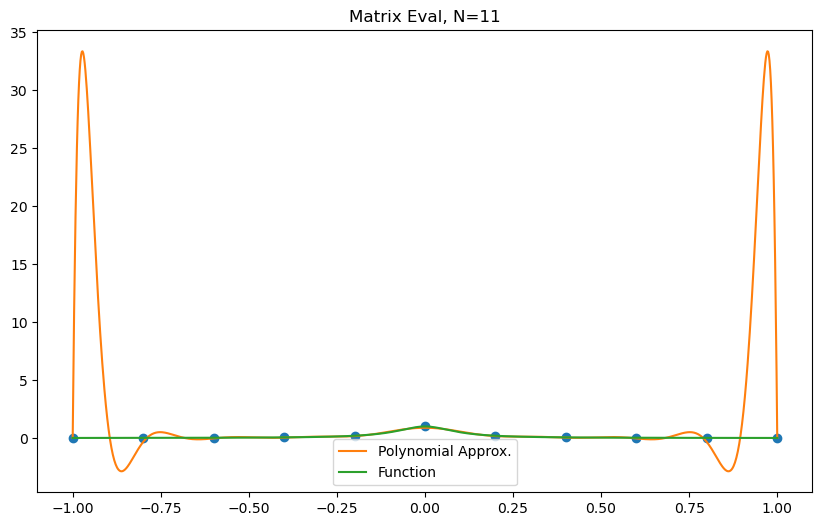

In [54]:

def matrix_eval(N, points):
    size = (N,N)
    
    matrix = np.zeros((N,N))
    f_vec = np.zeros((N,1))
    for i in range(N):
        f_vec[i,0] = points[i][1]     #fill the f_vec
        for j in range(N):
            matrix[i,j] = points[i][0]**j  #fill the matrix
#     print('vandermonde matrix:', vmonde)
#     print()

    coeffs = la.inv(matrix) @ f_vec
    return coeffs

def poly_eval(coeffs, x):
    val = np.zeros(x.size)
    for i in range(len(coeffs)):
        val += coeffs[i]*x**i
    return val

f = lambda x: 1 / (1 + (10*x)**2)
N = 20
h = 2/(N-1)
points = []
for i in range(1,N+1):
    xi = -1 + (i-1)*h
    fxi = f(xi)
    points.append((xi,fxi))
    
xi, fxi = zip(*points)
xi = np.array(xi)
fxi = np.array(fxi)

poly_coeffs = matrix_eval(N, points)
Neval = 1000
x = np.linspace(-1,1,Neval+1)
px = poly_eval(poly_coeffs, x)
fx = f(x)

plt.figure(figsize=(10,6))
plt.plot(xj,fxj,'o')
plt.plot(x,px, label='Polynomial Approx.')
plt.plot(x,fx, label='Function')
plt.title('Matrix Eval')
plt.legend()
plt.show()



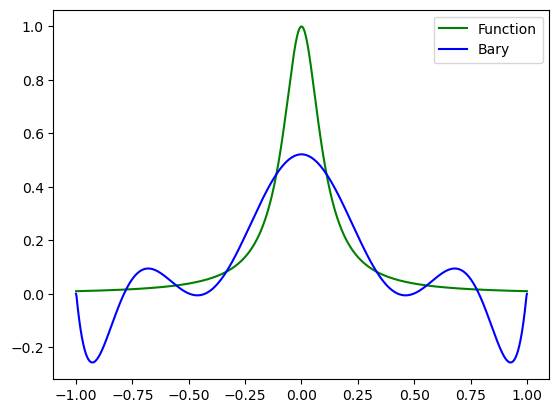

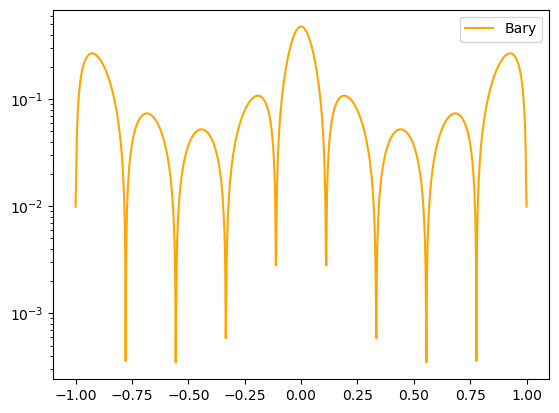

In [46]:
f = lambda x: 1 / (1 + (10*x)**2)
a = -1
b = 1

N = 10
h = 2/(N-1)

Neval = 1000


xint = np.linspace(-1,1,N)
fx = np.array(f(xint))


def bary_eval(x, xint, fx):
    
    l = 1
    for i in range(len(xint)):
        l *= (x-xint[i])
    
    
    summ = 0
    for j in range(len(xint)):
        if x != xint[j]:
            w = 1
            for k in range(len(xint)):
                if k != j:
                    w *= (xint[j] - xint[k])
                
            wj = 1/w 
            
            summ += (wj * fx[j]) / (x - xint[j])
    
        
    yeval = l*summ
        
    return yeval



xevals = np.linspace(a,b,Neval + 1)
f_evals = f(xevals)
yeval_b = np.zeros(Neval+1)
for kk in range(Neval+1):
    yeval_b[kk] = bary_eval(xevals[kk], xint, fx)

plt.plot(xevals, f_evals, 'g', label='Function')
plt.plot(xevals, yeval_b, 'b', label='Bary')
plt.legend()
plt.show()

plt.figure() 
err_b = abs(yeval_b - f_evals)
plt.semilogy(xevals, err_b, 'orange', label = 'Bary')
plt.legend()
plt.show()

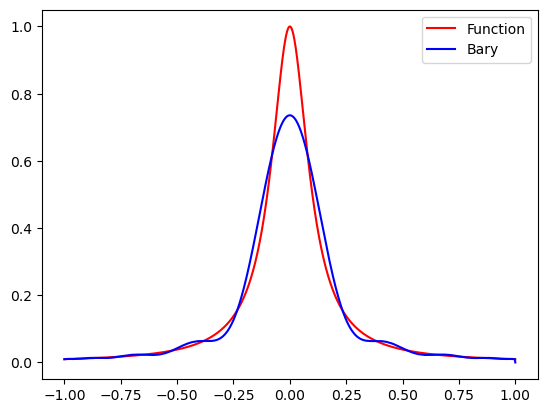

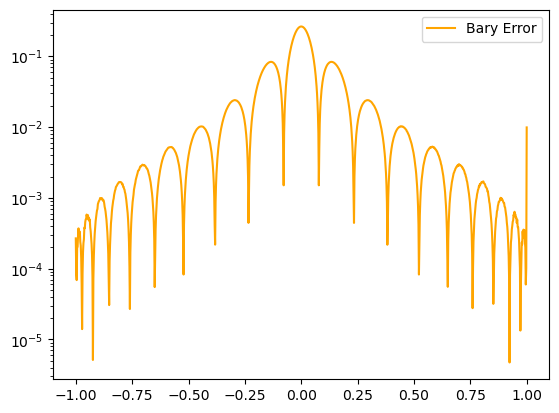

In [50]:
def driver3():


    f = lambda x: 1/(1+(10*x)**2)

    N = 20
    ''' interval'''
    a = -1
    b = 1
   
   
    ''' create equispaced interpolation nodes'''
    
    
    xint = np.cos((2*np.arange(1, N+2) - 1)*np.pi/(2*(N)))
    
    yint = []
    for i in xint:
        y = f(i)
        yint.append(y)
        
    
        
        
    
    ''' create points for evaluating the Lagrange interpolating polynomial'''
    Neval = 1000
    xeval = np.linspace(a,b,Neval+1)
    yeval_m = np.zeros(Neval+1)
    yeval_b = np.zeros(Neval+1)
  
    '''Initialize and populate the first columns of the 
     divided difference matrix. We will pass the x vector'''
    y = np.zeros( (N+1, N+1) )
    
     
    for kk in range(Neval):
        yeval_b[kk] = bary_eval(xeval[kk], xint, yint)
        
    
    
    ''' create vector with exact values'''
    fex = f(xeval)
       

    plt.figure()    
    plt.plot(xeval, fex, 'r', label = 'Function')
    plt.plot(xeval, yeval_b, 'b', label = 'Bary')
    plt.legend()
    plt.show()

    plt.figure() 
    err_b = abs(yeval_b - fex)
    plt.semilogy(xeval, err_b, 'orange', label = 'Bary Error')
    plt.legend()
    plt.show()
    
driver3()